In [4]:
import numpy as np
import pandas as pd

import os, sys
import random

try:
    os.chdir('CrowdInference')
    sys.path.append(os.getcwd())
except:
    pass

import crowd_inference.methods.dawid_skene as ds
import crowd_inference.methods.majority_vote as mv
import crowd_inference.methods.raykar as r
import crowd_inference.methods.raykar_boosting as rb
import crowd_inference.methods.raykar_plus_ds as rds
import crowd_inference.methods.classifier as cls
import benchmark as bm

from crowd_inference.truth_inference import NoFeaturesInference, TruthInference, WithFeaturesInference
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from collections import defaultdict
import tests.data_provider as data
from tqdm.auto import tqdm

import seaborn as sns
sns.set()
sns.set(font_scale=1.2)


from importlib import reload

def reload_all():
    reload(ds)
    reload(r)
    reload(rb)
    reload(rds)
    reload(cls)
    reload(bm)

reload(data)

<module 'tests.data_provider' from '/Users/andrey/Documents/5Course/CrowdInference/tests/data_provider.py'>

In [5]:
toloka_data = data.TolokaDataProvider()

Iter 00, logit: -7.475205
Iter 20, logit: -6.370250
Iter 40, logit: -6.368210
[0.14769311 0.10560202 0.41222155 0.06779544 0.26668787]
---------------
w225 [0. 1. 0. 0. 0.]
w225 [1.86909828e-54 5.95186484e-02 9.40481352e-01 0.00000000e+00
 0.00000000e+00]
w60 [0. 1. 0. 0. 0.]
w60 [2.77428287e-51 0.00000000e+00 9.13796691e-01 5.74688727e-02
 2.87344364e-02]
w745 [0.         0.91499451 0.08500549 0.         0.        ]
w745 [0.0394251 0.0394251 0.9211498 0.        0.       ]
w690 [0.         0.66666667 0.33333333 0.         0.        ]
w690 [0.         0.05951865 0.94048135 0.         0.        ]
w670 [0. 1. 0. 0. 0.]
w670 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 9.80331293e-69]
Label accuracy is 0.7655172413793103
--------------------------------------------------
Data has 53 features
Iter 00, logit: -7.637684
Iter 20, logit: -6.170058
Iter 40, logit: -5.982609
Iter 60, logit: -5.876876
Iter 80, logit: -5.813181
(870, 53)
Classifier train accuracy is 0.6839080459770

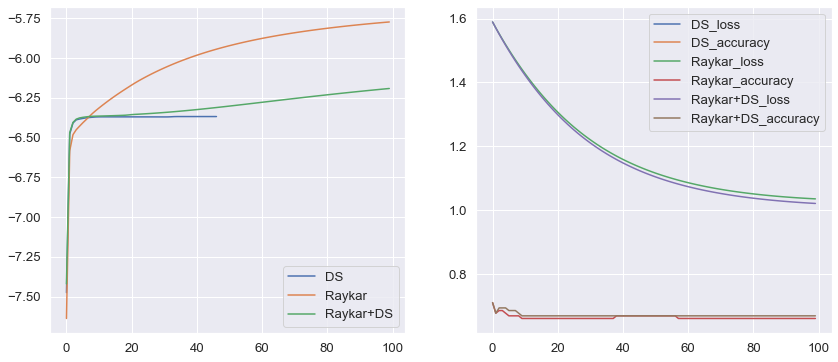

In [6]:
reload_all()
toloka_methods, toloka_points, advantages_matrix = bm.compare_methods(toloka_data, max_iter=100, lr=200)
# [('DS', 0.786074672048436), ('Raykar', 0.7790110998990918)]

Number of data points: 870


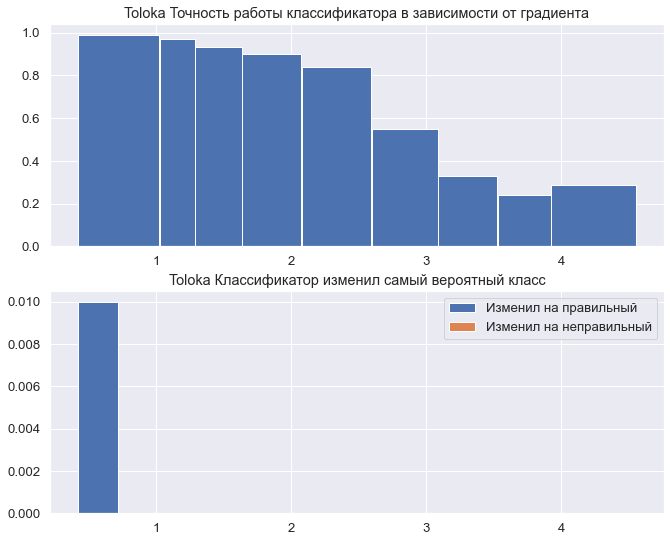

In [7]:
buckets, confidences, wrong, correct = bm.build_grad_hist(toloka_data, toloka_methods, toloka_points, 'Toloka', 100)
condidence_toloka = bm.get_confidence(buckets[0], confidences[0])

Iter 00, logit: -7.475205
Iter 20, logit: -6.370250
Iter 40, logit: -6.368210
[0.14769311 0.10560202 0.41222155 0.06779544 0.26668787]
---------------
w225 [0. 1. 0. 0. 0.]
w225 [1.86909828e-54 5.95186484e-02 9.40481352e-01 0.00000000e+00
 0.00000000e+00]
w60 [0. 1. 0. 0. 0.]
w60 [2.77428287e-51 0.00000000e+00 9.13796691e-01 5.74688727e-02
 2.87344364e-02]
w745 [0.         0.91499451 0.08500549 0.         0.        ]
w745 [0.0394251 0.0394251 0.9211498 0.        0.       ]
w690 [0.         0.66666667 0.33333333 0.         0.        ]
w690 [0.         0.05951865 0.94048135 0.         0.        ]
w670 [0. 1. 0. 0. 0.]
w670 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 9.80331293e-69]
Label accuracy is 0.7655172413793103
--------------------------------------------------
Data has 53 features
Iter 00, logit: -7.637684
Iter 20, logit: -6.170058
Iter 40, logit: -5.982609
Iter 60, logit: -5.876876
Iter 80, logit: -5.813181
(870, 53)
Classifier train accuracy is 0.6839080459770

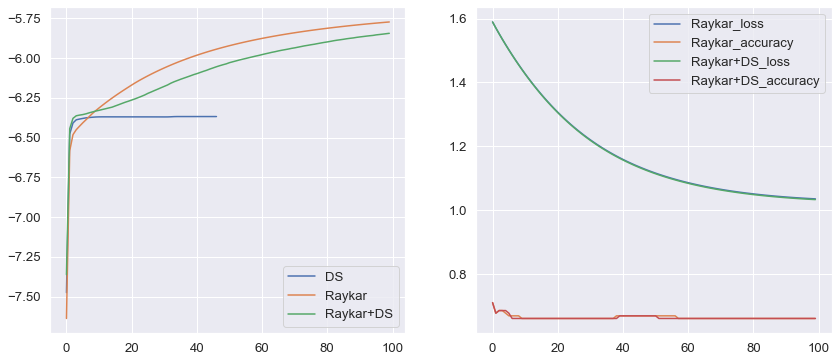

In [9]:
reload_all()
toloka_methods, toloka_points, advantages_matrix = bm.compare_methods(toloka_data, max_iter=100, lr=200, 
                                                                      confidence_estimator=condidence_toloka)

In [ ]:
reload_all()
bm.plot_all_gradients(toloka_points,
                              toloka_points[toloka_points.task.isin(advantages_matrix[0][1])], 'Toloka') 

In [ ]:
toloka_points[toloka_points.task.isin(advantages_matrix[1][0])]

In [ ]:
bm.plots_for_point(toloka_points, toloka_data, toloka_methods, 62)

In [ ]:
def build_conf_hist(points, name):
    max_confidence = np.array(list(map(lambda x: x.max(), points[name].values)))
    plt.hist(max_confidence, bins=20)
    print((max_confidence > 0.95).mean())
    print(max_confidence.min())
build_conf_hist(toloka_points, 'mu_ds')

In [ ]:
reload_all()
bm.plot_flips(toloka_points[toloka_points.task.isin(advantages_matrix[1][0])], 
              toloka_points[toloka_points.task.isin(advantages_matrix[0][1])], 'conf_mx_ds', 'Toloka', 'R улучшил', 'R ухудшил')